## PERL: Initial Grades Analysis  
**Joey Seitz
05,2017 **

In [1]:
import matplotlib.pyplot as plt #used to make the plots below
%matplotlib inline  
#makes them print in the jupyter notebook
import numpy as np          
import pandas as pd             #Use this for data loading and statistics
from collections import OrderedDict #use this sort sorting the dictionary 

In [2]:
#These are used in the graphing function below:
colors=["red","orange", "yellow","green","blue","purple","salmon","darkorange","c","seagreen","steelblue","violet","darkgray","brown"]
grade_key=["0.0","1.0","1.5","2.0","2.5","3.0","3.5","4.0"]

#### Indicates the Repeat and Reenrollment status for this particular enrollment.  The values and their meaning are:

PI-This enrollment is the predecessor, the successor is in progress;

PR-This enrollment is the predecessor, the successor is completed;

SI-This enrollment is the successor,the successor is in progress;

SR-This enrollment is the successor,the successor is completed; (the
previous codes assumed the predecessor and successor were both enrolled
at the same student level.

#### The following codes are used when the predecessor and successor are at different levels:

PX-predecessor course across levels;

SX-successor course across levels.

In addition, NR means not a repeat, RN means the enrollment is treated
as a reenrollment for credit, NN means not a reenrollment in a
reenrollable course.
#### Below is the key to the courses and what they mean:

| Grade Code| Long Description| 
|--------|-------------------------|
|I           |    Incomplete      |
|N           |    No Grade          |
|P            |   Pass |
|T            |   Transfer   |
|T1          |   Transfer Grade Below 2.0  |
|TWV        | Transfer Waiver-General Credit  |
|U           |    Unfinished Work  |
|V           |    Visitor  |
|W           |    Withdrawn  |
|WV1         |  Transfer Waiver Below 2.0  |
|WVR         |  Repeatable Waiver  |
 

In [3]:
classes_FS01=pd.read_excel("61331_Classes_FS01-US16_part1.xlsx")       #reads the data file and saves it
classes_FS01_2=pd.read_excel("61331_Classes_FS01-US16_part2.xlsx") 

In [4]:
# add both parts together, Make sure they are 551,937 total before moving on!
classes_FS01.append(classes_FS01_2, ignore_index=True) 
#print(classes_FS01.head()) 

,placeholderID,term_seq_id,term_code,subj_code,crse_code,sctn_code,grade_code,repeat_status_flag,major
0,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1014,FS01,PHY,251,24.0,2.5,,3611 - Earth Science
1,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,MTH,126,5.0,3.0,SR,3611 - Earth Science
2,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,PHY,232,1.0,1.0,,3611 - Earth Science
3,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,PHY,252,20.0,1.5,,3611 - Earth Science
4,592FB87B-B37F-476D-B7F0-0001F057D6A6,1014,FS01,MTH,110,8.0,2.0,,4494 - Social Work
5,9C41EAAC-FC57-42F9-B53F-000201BE35C3,1054,FS05,MTH,103,1.0,2.0,,1069 - General Business Admin-Prelaw
6,9C41EAAC-FC57-42F9-B53F-000201BE35C3,1056,SS06,MTH,124,3.0,2.5,,4380 - Political Science-Prelaw
7,7AED7EC2-ED7F-4FE1-8270-000209CBA389,1054,FS05,MTH,103,2.0,3.0,,5151 - No Preference
8,7AED7EC2-ED7F-4FE1-8270-000209CBA389,1064,FS06,MTH,124,27.0,2.0,,3969 - Human Biology
9,7AED7EC2-ED7F-4FE1-8270-000209CBA389,1076,SS08,PHY,231C,730.0,2.5,,3969 - Human Biology


In [5]:
 #use if you need a refferenc of all the possible grades
#key=["0.0","1.0","1.5","2.0","2.5","3.0","3.5","4.0","I","N","P","T","T1","TWV","U","V","W","WV1","WVR"," "]

#This splits the classes by the type of classes in the data set
lb=classes_FS01[classes_FS01.subj_code=="LB"]
lbs=classes_FS01[classes_FS01.subj_code=="LBS"]
mth=classes_FS01[classes_FS01.subj_code=="MTH"]
phy=classes_FS01[classes_FS01.subj_code=="PHY"]

In [6]:
#creates the function that will be used down below
def graphing_grades (data_group,column,title_name):
    unique = np.unique(data_group[column]) #makes a list of the unique values in the set
    counts = {}                            #empty dictionary to add and count our values
    
    for uniq in unique:
        counts[uniq] = list(data_group[column]).count(uniq) #counts up the number of unique values that we found above
        for word in counts:
            counts=OrderedDict(counts)         #this will order the dictionary to show numbers first then letters in alphabetical  order
    

    plt.figure(figsize=(10,6)) #make the figure a certain size
    for thing in grade_key:
        plt.bar(float(thing), counts[thing], width=0.25)   #this will plot only the grades for the classes in a bar graph
    plt.title(title_name)                                  #makes it so you can import the name when calling the function
    plt.xlabel("Grade")
    plt.ylabel("Counts")
    plt.show()
    
    print(counts) #This will print the dictonary in order to show what the pie graph is repressenting 
    
    labels = counts.keys() #takes the dictionary and saves just the "title" of the counts
    counts_overall = counts.values() #takes the dictionary and saves just the counts of the variables
    explode=np.repeat(.1,len(list(labels))) #this is used to expand the graph to be able to see the size of it
    
    plt.figure(figsize=(10,10)) #Make the figure larger
    plt.pie(list(counts_overall),labels=list(labels),autopct='%1.1f%%',shadow=True,colors=colors,explode=explode)
    plt.title(title_name)
    plt.tight_layout()
    plt.legend(loc="best",bbox_to_anchor=(1.2, 1))
    plt.show()


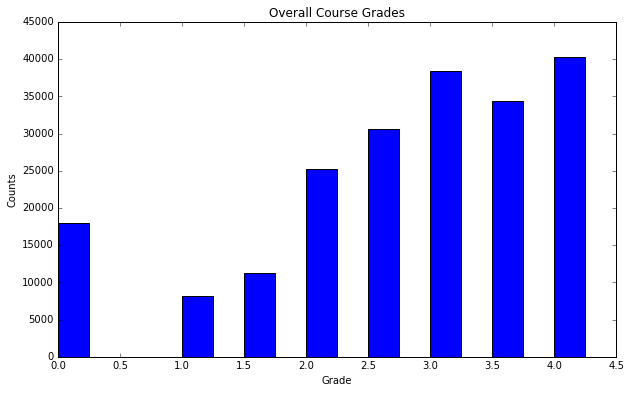

OrderedDict([(' ', 216), ('0.0', 18035), ('1.0', 8184), ('1.5', 11313), ('2.0', 25281), ('2.5', 30560), ('3.0', 38370), ('3.5', 34341), ('4.0', 40276), ('I', 15), ('N', 410), ('P', 2567), ('T', 51946), ('T1', 260), ('TWV', 2823), ('U', 23), ('V', 73), ('W', 166), ('WV', 9719), ('WV1', 67), ('WVR', 354)])


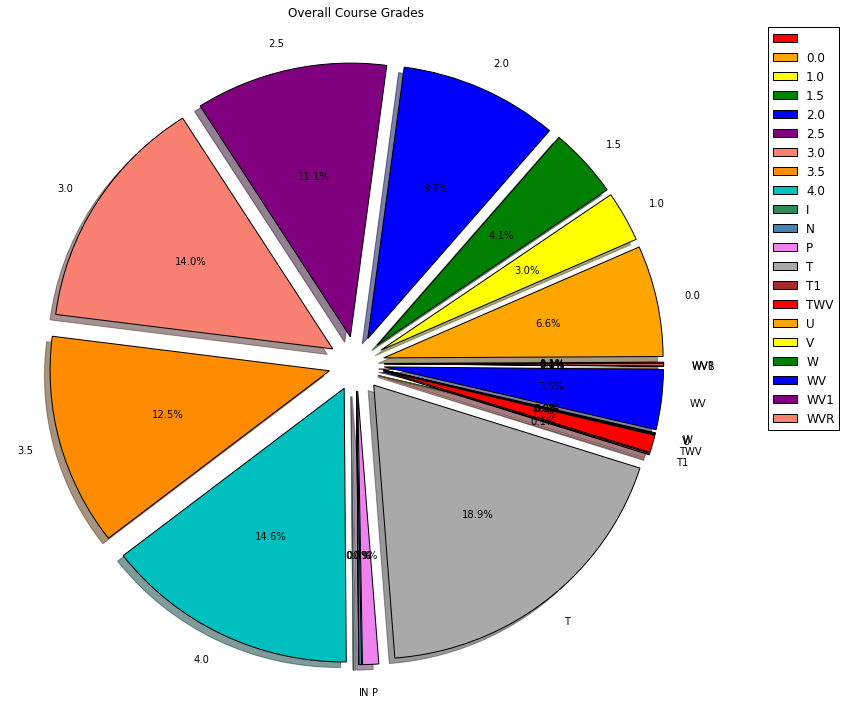

In [7]:
#This is running all of the classses from the data set
graphing_grades(classes_FS01,"grade_code","Overall Course Grades")

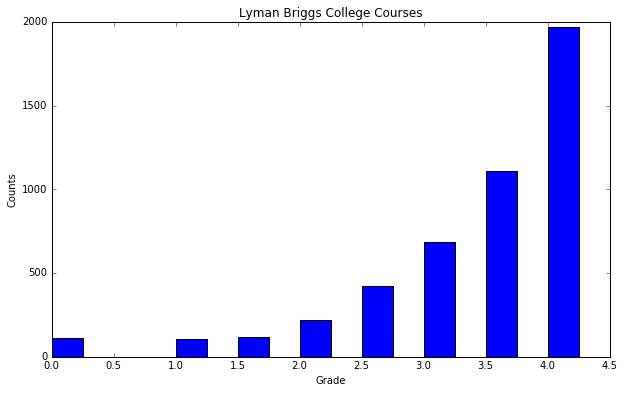

OrderedDict([('0.0', 114), ('1.0', 109), ('1.5', 119), ('2.0', 218), ('2.5', 421), ('3.0', 686), ('3.5', 1112), ('4.0', 1971), ('I', 1), ('U', 1), ('W', 4)])


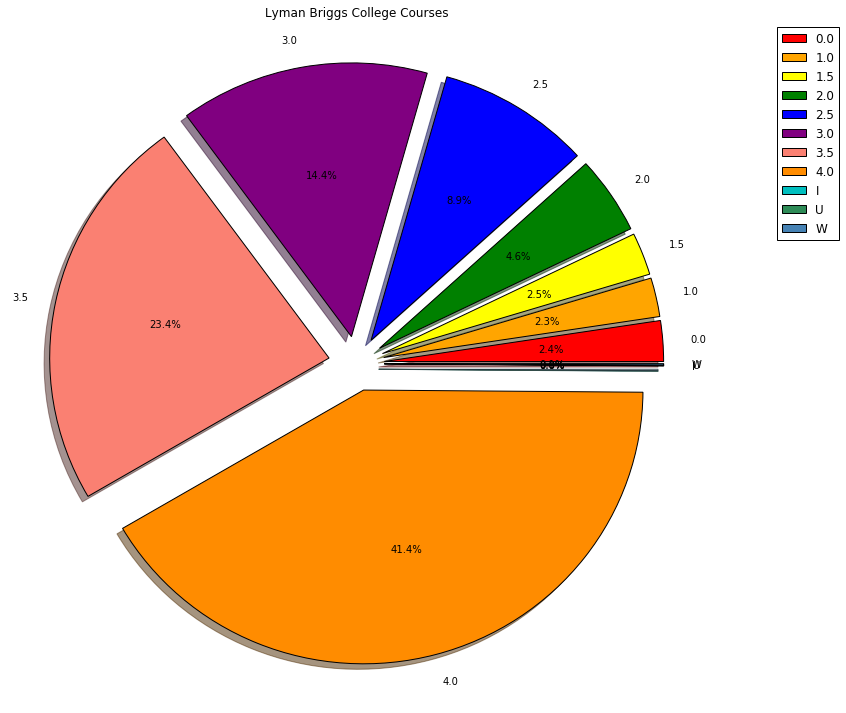

In [8]:
#this is just running Lyman Briggs College courses 
graphing_grades(lb,"grade_code","Lyman Briggs College Courses")

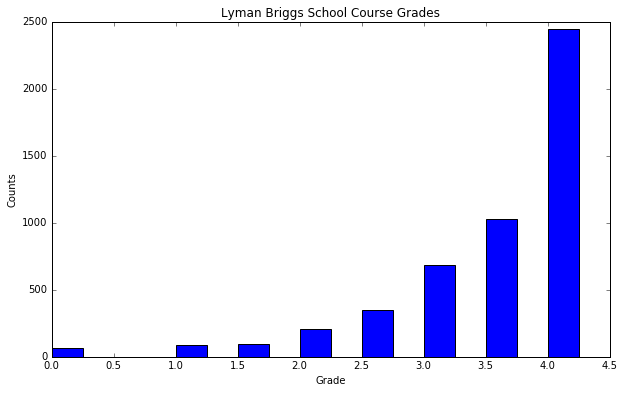

OrderedDict([('0.0', 68), ('1.0', 85), ('1.5', 98), ('2.0', 207), ('2.5', 347), ('3.0', 684), ('3.5', 1027), ('4.0', 2445), ('T', 3), ('W', 1), ('WV', 1)])


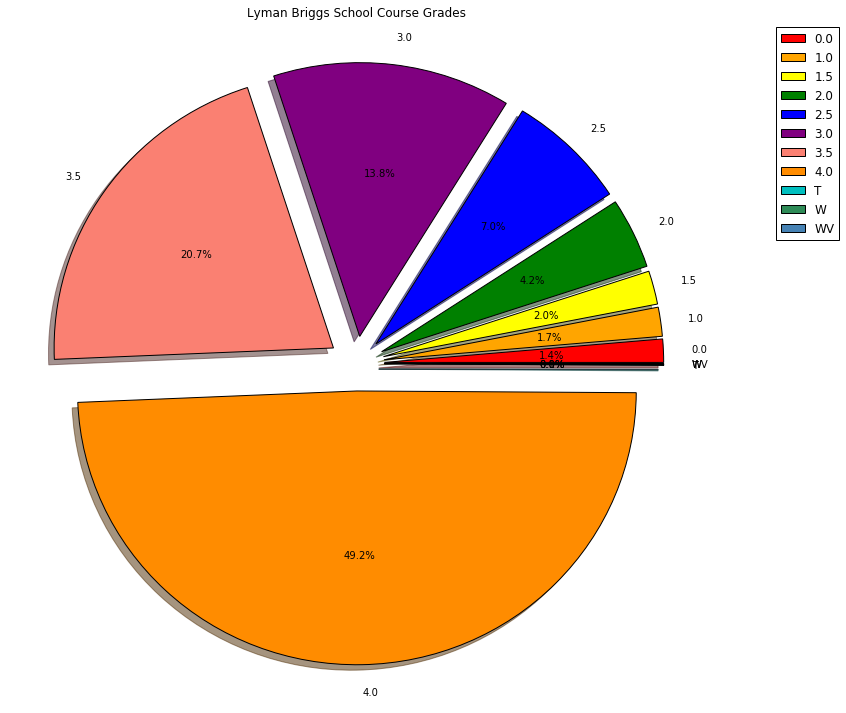

In [9]:
#This is running the Lyman Briggs School course grades 
graphing_grades(lbs,"grade_code","Lyman Briggs School Course Grades")

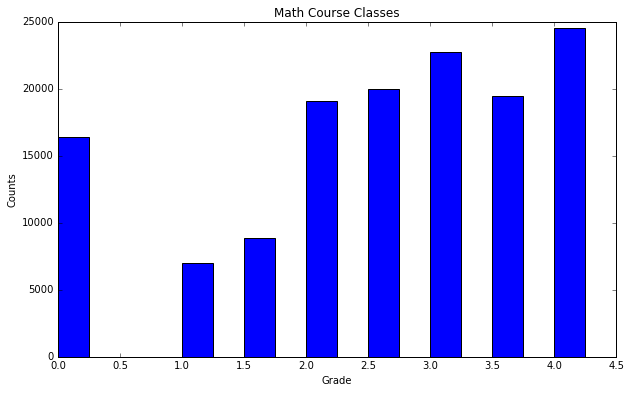

OrderedDict([(' ', 216), ('0.0', 16380), ('1.0', 6970), ('1.5', 8855), ('2.0', 19084), ('2.5', 19985), ('3.0', 22760), ('3.5', 19438), ('4.0', 24565), ('I', 11), ('N', 410), ('P', 2567), ('T', 41355), ('T1', 220), ('TWV', 2666), ('U', 19), ('V', 70), ('W', 113), ('WV', 9324), ('WV1', 65), ('WVR', 354)])


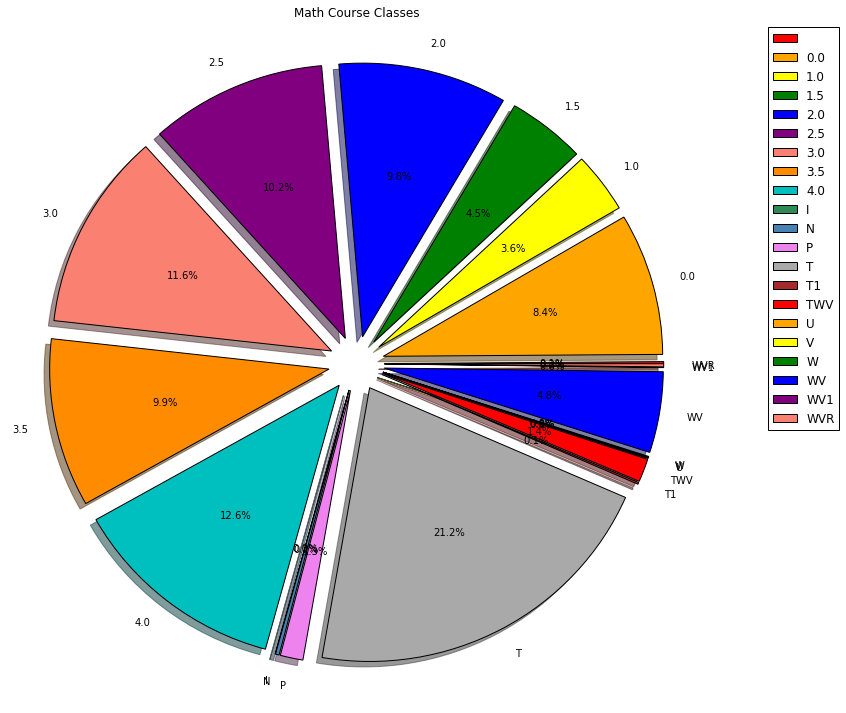

In [10]:
#This is running just the math course grades 
graphing_grades(mth,"grade_code","Math Course Classes")

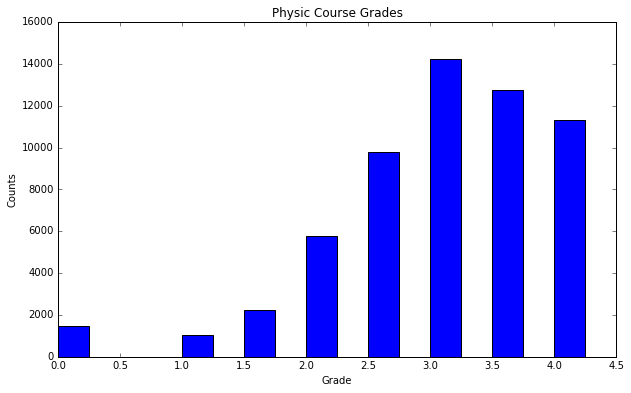

OrderedDict([('0.0', 1473), ('1.0', 1020), ('1.5', 2241), ('2.0', 5772), ('2.5', 9807), ('3.0', 14240), ('3.5', 12764), ('4.0', 11295), ('I', 3), ('T', 10588), ('T1', 40), ('TWV', 157), ('U', 3), ('V', 3), ('W', 48), ('WV', 394), ('WV1', 2)])


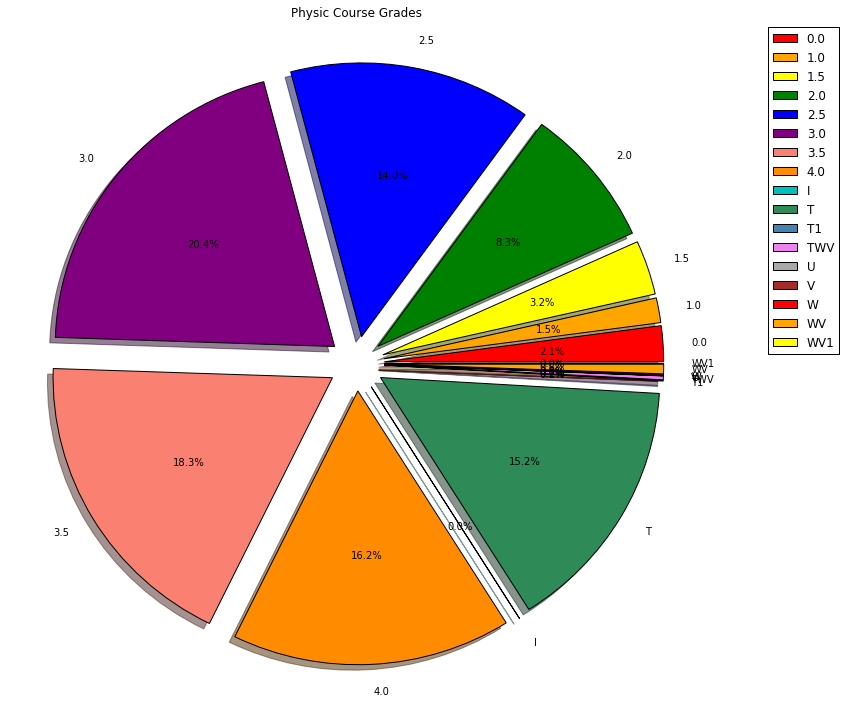

In [11]:
#this is running the physics course grades
graphing_grades(phy,"grade_code","Physic Course Grades")

## These cells below are random stuff I Used at first to "evolve" my code
It is commented out so it doesn't run errors, ignore it!

In [12]:
'''
demogra=pd.read_excel("61331_Demogs_FS01-US16_part1.xlsx")       #reads the data file and saves it
d2=pd.read_excel("61331_Demogs_FS01-US16_part2.xlsx") 
demogra.append(d2, ignore_index=True)
print(demogra)
'''

'\ndemogra=pd.read_excel("61331_Demogs_FS01-US16_part1.xlsx")       #reads the data file and saves it\nd2=pd.read_excel("61331_Demogs_FS01-US16_part2.xlsx") \ndemogra.append(d2, ignore_index=True)\nprint(demogra)\n'

In [13]:
#demogra.count()

In [14]:
'''
This cell was the first attempt of splittin up the data sets:

lb_grades=list(lb.grade_code) #lb college data only overall grades 
#grades.str.findall("T").count()
#print(lb_grades)
key=["other","0.0","1.0","1.5","2.0","2.5","3.0","3.5","4.0"]
#"I","N","P","T","T1","TWV","U","V","W","WV1","WVR",
colors=["red","orange", "yellow","green","blue","purple","salmon","darkorange","c","seagreen","steelblue","violet","darkgray","brown"]
other={"I","N","P","T","T1","TWV","U","V","W","WV1","WVR"}
lb_other=0
for i in lb_grades:
    if i in other:
        lb_other+=1

lb_i=lb_grades.count("I")
lb_ng=lb_grades.count("N")
lb_pass=lb_grades.count("P")
lb_t=lb_grades.count("T")
lb_ti=lb_grades.count("T1")
lb_twv=lb_grades.count("TWV")
lb_u=lb_grades.count("U")
lb_v=lb_grades.count("V")
lb_w=lb_grades.count("W")
lb_wv1=lb_grades.count("WV1")
lb_wvr=lb_grades.count("WVR")
#lb_other=lb_wvr+lb_w+lb_v+lb_u+lb_twv+lb_ti+lb_t+lb_pass+lb_ng
lb_0=lb_grades.count("0.0")
#lb_05=lb_grades.count("0.5") #there are no 0.5 grades given
lb_1=lb_grades.count("1.0")
lb_15=lb_grades.count("1.5")
lb_2=lb_grades.count("2.0")
lb_25=lb_grades.count("2.5")
lb_3=lb_grades.count("3.0")
lb_35=lb_grades.count("3.5")
lb_4=lb_grades.count("4.0")

lb_grade_counts=[6,lb_0,lb_1,lb_15,lb_2,lb_25,lb_3,lb_35,lb_4] #lb_i,lb_ng,lb_pass,lb_t,lb_ti,lb_twv,
#print(key)
#print(lb_grade_counts)
#print(sum(lb_grade_counts))
print(len(lb_grades))
print(lb_other)


#classes_FS01.plot(kind='pie',labels='grade_code',values='values',y="grade_code")
#lb.hist(column="grade_code",by="crse_code",figsize=(16,6),color="g",bins=15)
#classes_FS01.plot.pie(y="grade_code")


lb_uniques = np.unique(lb['grade_code'])
lb_counts = {}
for uniq in uniques:
    counts[uniq] = list(lb['grade_code']).count(uniq)
    
plt.figure(figsize=(10,6))
for thing in ["0.0","1.0","1.5","2.0","2.5","3.0","3.5","4.0"]:
    plt.bar(float(thing), counts[thing], width=0.25)
plt.title("Overall Lyman Briggs College Classes Scores")
plt.xlabel("Grade")
plt.ylabel("Counts")
plt.show()


'''

'\nThis cell was the first attempt of splittin up the data sets:\n\nlb_grades=list(lb.grade_code) #lb college data only overall grades \n#grades.str.findall("T").count()\n#print(lb_grades)\nkey=["other","0.0","1.0","1.5","2.0","2.5","3.0","3.5","4.0"]\n#"I","N","P","T","T1","TWV","U","V","W","WV1","WVR",\ncolors=["red","orange", "yellow","green","blue","purple","salmon","darkorange","c","seagreen","steelblue","violet","darkgray","brown"]\nother={"I","N","P","T","T1","TWV","U","V","W","WV1","WVR"}\nlb_other=0\nfor i in lb_grades:\n    if i in other:\n        lb_other+=1\n\nlb_i=lb_grades.count("I")\nlb_ng=lb_grades.count("N")\nlb_pass=lb_grades.count("P")\nlb_t=lb_grades.count("T")\nlb_ti=lb_grades.count("T1")\nlb_twv=lb_grades.count("TWV")\nlb_u=lb_grades.count("U")\nlb_v=lb_grades.count("V")\nlb_w=lb_grades.count("W")\nlb_wv1=lb_grades.count("WV1")\nlb_wvr=lb_grades.count("WVR")\n#lb_other=lb_wvr+lb_w+lb_v+lb_u+lb_twv+lb_ti+lb_t+lb_pass+lb_ng\nlb_0=lb_grades.count("0.0")\n#lb_05=lb_gr